<a href="https://colab.research.google.com/github/Raihan4520/YOLO11/blob/main/Image_Classification_YOLO11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification** using YOLO11

In [1]:
# Check GPU
!nvidia-smi


Tue Oct  1 14:38:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Install the necessary libraries
!pip install ultralytics roboflow opencv-python pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.4/881.4 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [3]:
# Download the dataset
# !pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="*** Use Your Own API Key ***") # Use your API key here
project = rf.workspace("rockpaperscissors-adtav").project("plants-classification-zcckg")
version = project.version(3)
dataset = version.download("folder")

# Dataset link: https://universe.roboflow.com/rockpaperscissors-adtav/plants-classification-zcckg/dataset/3#


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to plants-classification-3 in folder:: 100%|██████████| 9120/9120 [00:03<00:00, 2296.60it/s]


In [4]:
# Train the YOLO11 model
from ultralytics import YOLO

# Path to the data.yaml file
data_path = '/content/plants-classification-3'

# Initialize the YOLO11 model - using the nano model for speed
model = YOLO('yolo11n-cls.pt')  # Load a pretrained YOLO11 model

# Train the model
model.train(task='classify', mode='train', data=data_path, epochs=10) # task and mode are optional parameters

# Train using CLI (In this project all python code is used instead of CLI)
# !yolo task=classify mode=train model=yolo11n-cls.pt data=data_path epochs=10


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.52M/5.52M [00:00<00:00, 93.9MB/s]


Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=/content/plants-classification-3, epochs=10, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

100%|██████████| 5.35M/5.35M [00:00<00:00, 112MB/s]

WARNING ⚠️ yolo11n.pt appears to require 'dill', which is not in Ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official Ultralytics model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.5 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 2.3s, installed 1 package: ['dill']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

AMP: checks passed ✅


train: Scanning /content/plants-classification-3/train... 7905 images, 0 corrupt: 100%|██████████| 7905/7905 [00:02<00:00, 3908.89it/s]

train: New cache created: /content/plants-classification-3/train.cache



val: Scanning /content/plants-classification-3/test... 376 images, 0 corrupt: 100%|██████████| 376/376 [00:00<00:00, 1741.57it/s]

val: New cache created: /content/plants-classification-3/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 10 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/10     0.296G      3.482         16        224:   1%|▏         | 7/495 [00:01<01:21,  5.97it/s]

       1/10     0.296G      3.456         16        224:   2%|▏         | 10/495 [00:02<01:11,  6.77it/s]
100%|██████████| 755k/755k [00:00<00:00, 21.7MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  7.13it/s]

                   all      0.872      0.989



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]

                   all      0.904      0.995



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  7.05it/s]

                   all       0.88      0.997



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  6.47it/s]

                   all      0.918      0.995



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  6.30it/s]

                   all      0.931          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  7.11it/s]

                   all      0.947      0.995



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:03<00:00,  3.60it/s]

                   all      0.947          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  6.89it/s]

                   all      0.949      0.997



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  6.75it/s]

                   all      0.963      0.997



      Epoch    GPU_mem       loss  Instances       Size


      10/10     0.271G      0.119          1        224: 100%|██████████| 495/495 [01:20<00:00,  6.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  7.17it/s]

                   all      0.965          1



10 epochs completed in 0.237 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.3MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.3MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-cls summary (fused): 112 layers, 1,560,611 parameters, 0 gradients, 3.2 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/plants-classification-3/train... found 7905 images in 27 classes ✅ 
val: None...
test: /content/plants-classification-3/test... found 376 images in 27 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]


                   all      0.965          1
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a13542305b0>
curves: []
curves_results: []
fitness: 0.9827127754688263
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9654255509376526, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9827127754688263}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.14314752943972323, 'inference': 0.5594929482074494, 'loss': 0.0004343529965015168, 'postprocess': 0.0003937711106969955}
task: 'classify'
top1: 0.9654255509376526
top5: 1.0

In [7]:
# Export the model
# model.export(format='onnx')  # You can choose 'tflite', 'torchscript', etc.


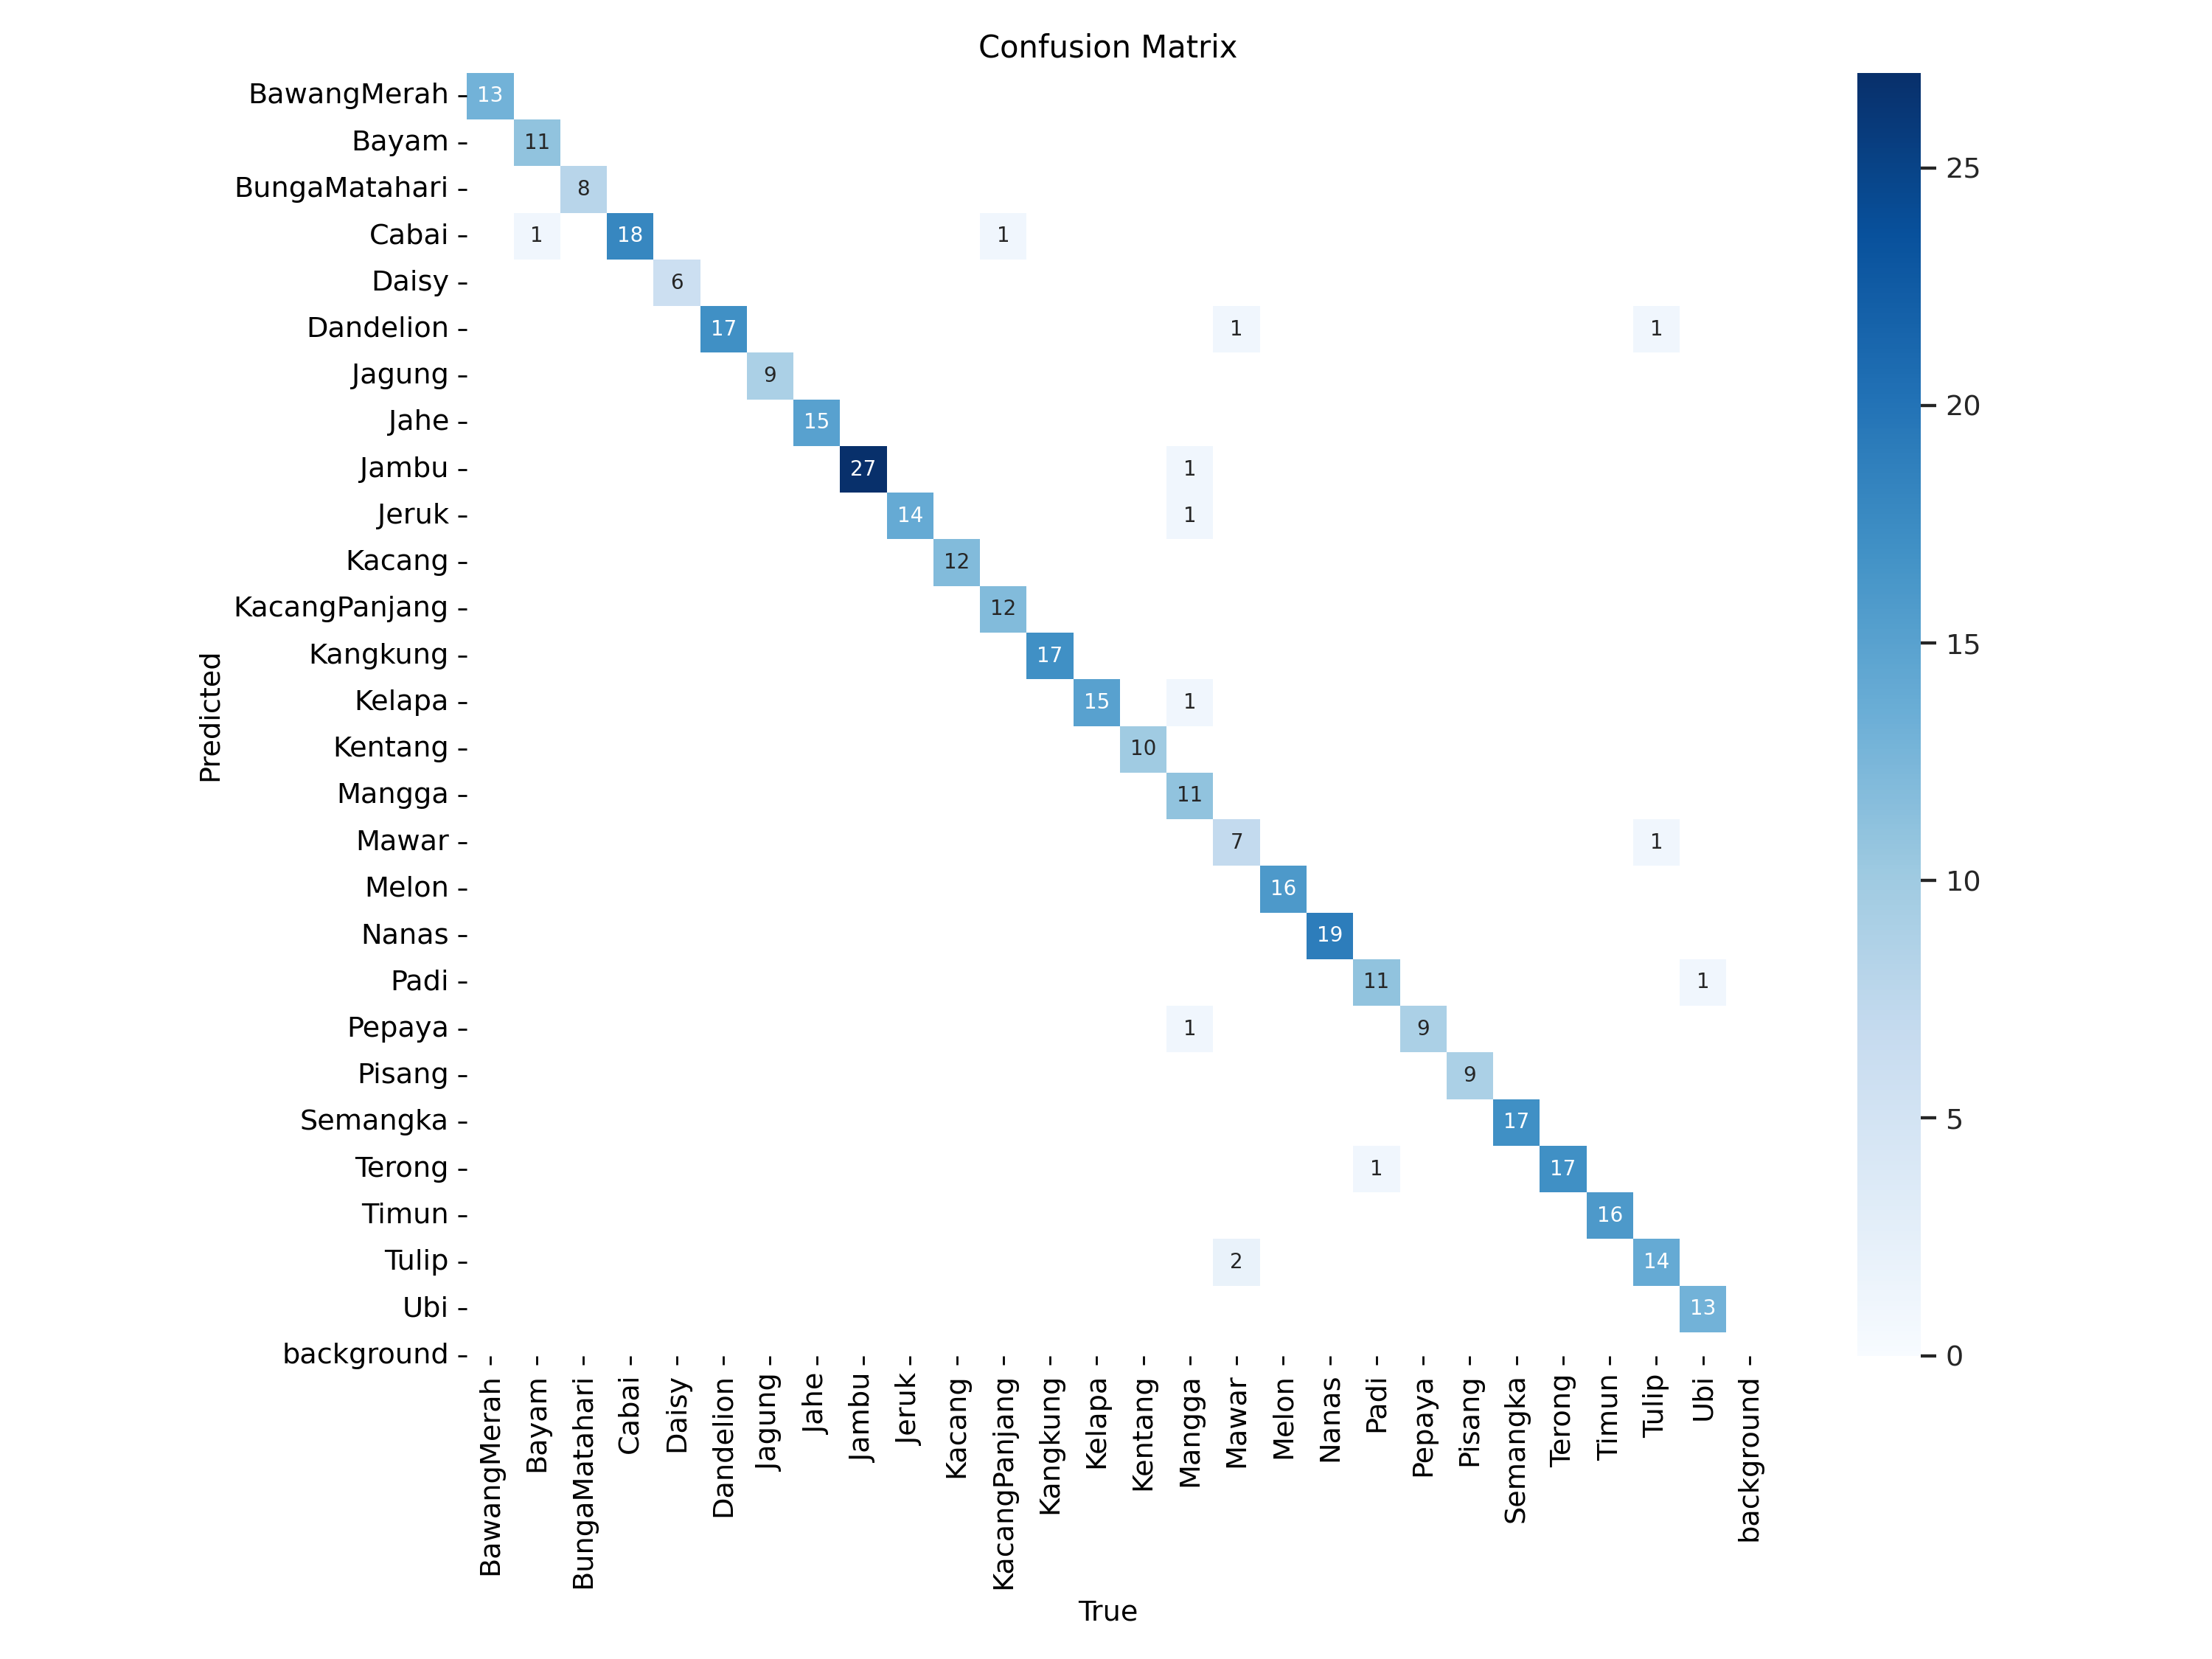

In [8]:
# Show Confusion Matrix
from IPython.display import Image, display
display(Image('/content/runs/classify/train/confusion_matrix.png'))


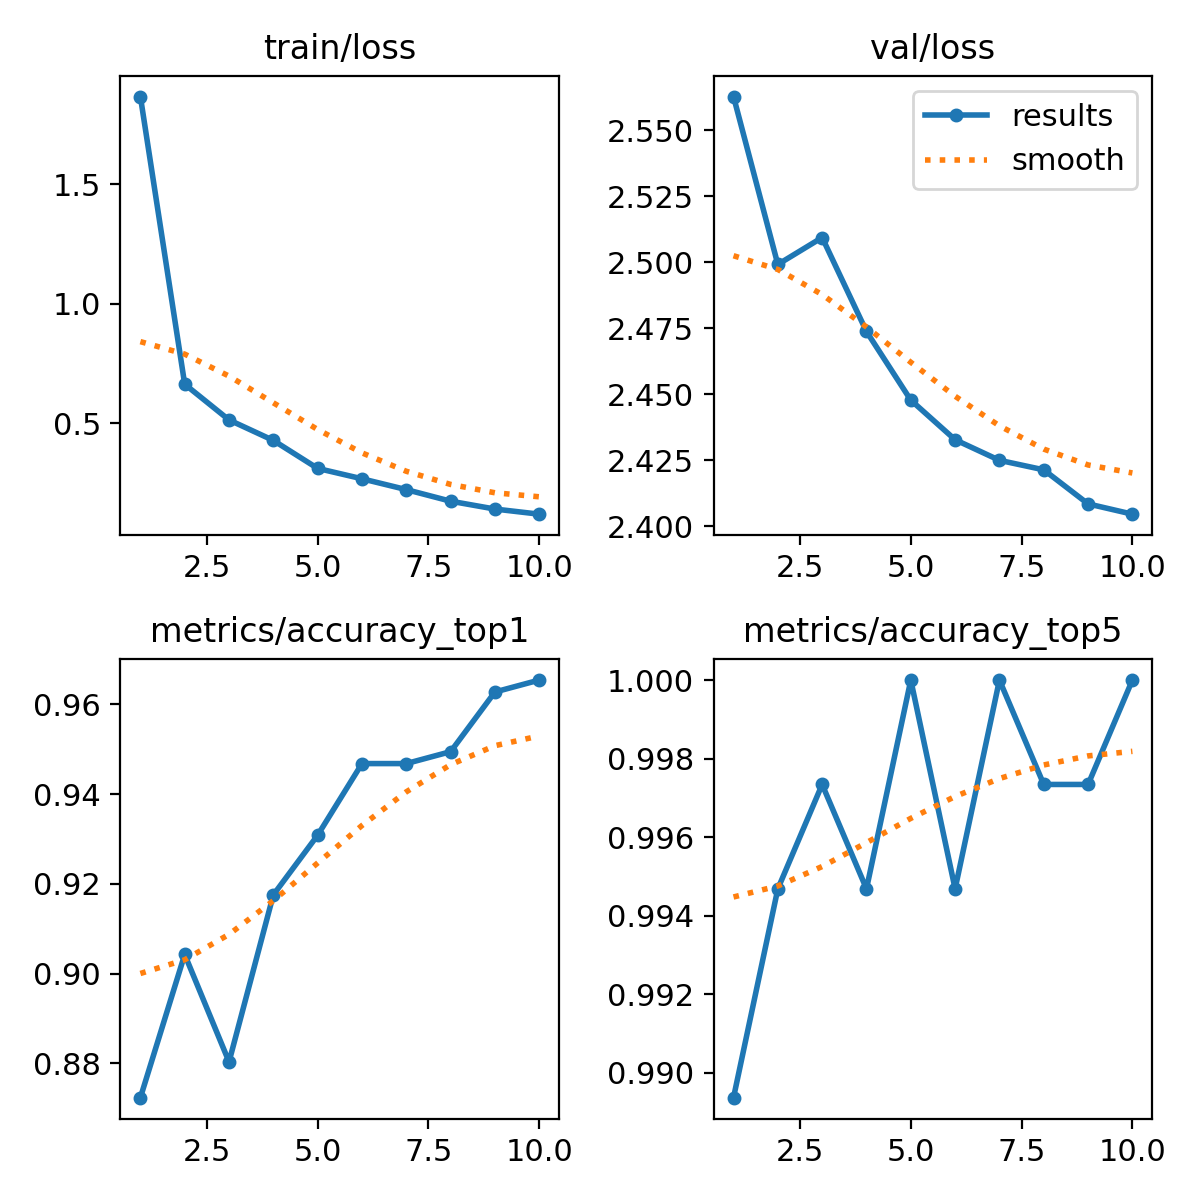

In [9]:
# Show Results (image)
display(Image('/content/runs/classify/train/results.png'))


In [10]:
# Show Results (table)
import pandas as pd

# Load the CSV file into a pandas DataFrame
csv_file_path = '/content/runs/classify/train/results.csv'
df = pd.read_csv(csv_file_path)

# Display the DataFrame
print(df)


                     epoch               train/loss    metrics/accuracy_top1  \
0                        1                  1.86740                  0.87234   
1                        2                  0.66301                  0.90426   
2                        3                  0.51357                  0.88032   
3                        4                  0.42774                  0.91755   
4                        5                  0.31053                  0.93085   
5                        6                  0.26716                  0.94681   
6                        7                  0.22180                  0.94681   
7                        8                  0.17331                  0.94947   
8                        9                  0.14043                  0.96277   
9                       10                  0.11898                  0.96543   

     metrics/accuracy_top5                 val/loss                   lr/pg0  \
0                  0.98936             

In [11]:
# Package imports and train path
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_path = '/content/runs/classify/train'


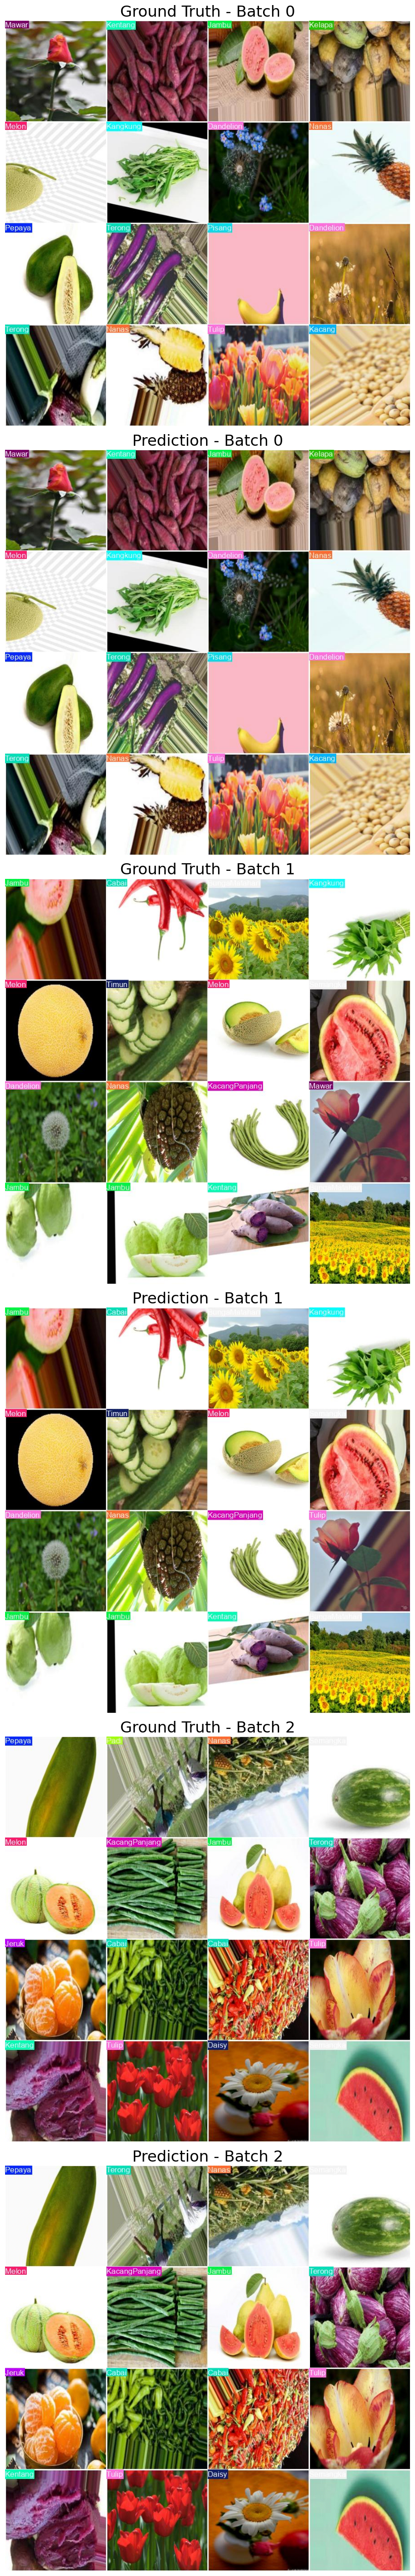

In [12]:
# Validation Results: Ground Truth vs Prediction

# Load your images using matplotlib's imread
img1 = mpimg.imread(f'{train_path}/val_batch0_labels.jpg')
img2 = mpimg.imread(f'{train_path}/val_batch0_pred.jpg')
img3 = mpimg.imread(f'{train_path}/val_batch1_labels.jpg')
img4 = mpimg.imread(f'{train_path}/val_batch1_pred.jpg')
img5 = mpimg.imread(f'{train_path}/val_batch2_labels.jpg')
img6 = mpimg.imread(f'{train_path}/val_batch2_pred.jpg')

# Get image dimensions (assuming all images are of the same size)
img_height, img_width, _ = img1.shape

# Create a figure with subplots, adjusting the figure size to match the image size
fig, axes = plt.subplots(6, 1, figsize=(img_width / 100, 6 * img_height / 100))  # 6 rows, 1 column

# Add a title to the figure with a bigger font size
# fig.suptitle('Validation Results: Ground Truth vs Prediction', fontsize=24)

# Plot the images and add larger titles for each subplot
axes[0].imshow(img1)
axes[0].set_title("Ground Truth - Batch 0", fontsize=22)  # Larger subplot title
axes[1].imshow(img2)
axes[1].set_title("Prediction - Batch 0", fontsize=22)

axes[2].imshow(img3)
axes[2].set_title("Ground Truth - Batch 1", fontsize=22)
axes[3].imshow(img4)
axes[3].set_title("Prediction - Batch 1", fontsize=22)

axes[4].imshow(img5)
axes[4].set_title("Ground Truth - Batch 2", fontsize=22)
axes[5].imshow(img6)
axes[5].set_title("Prediction - Batch 2", fontsize=22)

# Turn off axes for all subplots
for ax in axes:
    ax.axis('off')

# Adjust layout to prevent overlap and show the title
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plot
plt.show()


In [13]:
# Predict on test data using trained model
import os

# Load the trained classification model
model = YOLO('/content/runs/classify/train/weights/best.pt')

# Specify the test folder path (which contains class subfolders)
test_folder = '/content/plants-classification-3/test'

# Loop through each class folder in the test directory
for class_folder in os.listdir(test_folder):
    class_folder_path = os.path.join(test_folder, class_folder)

    # Make sure it's a directory (to avoid any non-folder files)
    if os.path.isdir(class_folder_path):
        ground_truth_class = class_folder  # This is the ground truth class based on the folder name
        print(f"Processing class folder (Ground Truth): {ground_truth_class}")

        # List all images in the current class folder
        image_files = [os.path.join(class_folder_path, img) for img in os.listdir(class_folder_path) if img.endswith(('.jpg', '.jpeg', '.png'))]

        # Predict on each image in the class folder
        for img_path in image_files:
            # Perform classification on the image
            results = model.predict(img_path, conf=0.50)

            # Loop through the results and extract predictions
            for result in results:
                # Get the predicted class index (top-1) and confidence
                predicted_class_index = result.probs.top1              # Get the predicted class index (top-1)
                predicted_class = result.names[predicted_class_index]  # Map index to class name
                confidence = result.probs.top1conf                     # Get the confidence score for the top prediction

                # Display the prediction results for the image along with ground truth
                print(f"Image: {img_path}")
                print(f"Ground Truth: {ground_truth_class}, Predicted class: {predicted_class}, Confidence: {confidence:.2f}")


Processing class folder (Ground Truth): Pisang

image 1/1 /content/plants-classification-3/test/Pisang/aug_0_9391_jpg.rf.fb8e8c17e2b06d1975a54e341eba37b0.jpg: 224x224 Pisang 1.00, Mangga 0.00, Cabai 0.00, Pepaya 0.00, Terong 0.00, 5.8ms
Speed: 6.8ms preprocess, 5.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Image: /content/plants-classification-3/test/Pisang/aug_0_9391_jpg.rf.fb8e8c17e2b06d1975a54e341eba37b0.jpg
Ground Truth: Pisang, Predicted class: Pisang, Confidence: 1.00

image 1/1 /content/plants-classification-3/test/Pisang/aug_0_349_jpg.rf.d93a981ac2d6663fadbf74c2670975b6.jpg: 224x224 Pisang 1.00, KacangPanjang 0.00, Nanas 0.00, Cabai 0.00, Dandelion 0.00, 4.7ms
Speed: 5.3ms preprocess, 4.7ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
Image: /content/plants-classification-3/test/Pisang/aug_0_349_jpg.rf.d93a981ac2d6663fadbf74c2670975b6.jpg
Ground Truth: Pisang, Predicted class: Pisang, Confidence: 1.00

image 1/1 /content/plants-class

In [14]:
# The accuracy of the model is very low because it has been trained over very few epochs.
# This project is only for learning purpose.
